<a href="https://colab.research.google.com/github/Narimaneker/ML-and-DL-assignmenets/blob/main/ML_assignements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**





In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


In [ ]:
import tensorflow as tf
from tensorflow import keras

MLP


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │        23,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,970 (93.63 KB)

 Trainable params: 23,970 (93.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="Adam",
 metrics=["accuracy"])
history=model.fit(x_train, y_train, epochs=10,validation_split=0.1 ,batch_size=32)


Epoch 1/10
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7505 - loss: 0.8028 - val_accuracy: 0.9382 - val_loss: 0.2182
Epoch 2/10
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9273 - loss: 0.2506 - val_accuracy: 0.9525 - val_loss: 0.1679
Epoch 3/10
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9461 - loss: 0.1856 - val_accuracy: 0.9582 - val_loss: 0.1506
Epoch 4/10
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9524 - loss: 0.1556 - val_accuracy: 0.9620 - val_loss: 0.1348
Epoch 5/10
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9587 - loss: 0.1388 - val_accuracy: 0.9693 - val_loss: 0.1211
Epoch 6/10
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9646 - loss: 0.1206 - val_accuracy: 0.9645 - val_loss: 0.1257
Epoch 7/10
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9665 - loss: 0.1088 - val_accuracy: 0.9658 - val_loss: 0.1224
Epoch 8/10
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9690 - loss: 0.1018 - 

In [ ]:
loss,accuracy=model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9535 - loss: 28.1257
23.833240509033203
0.9595999717712402


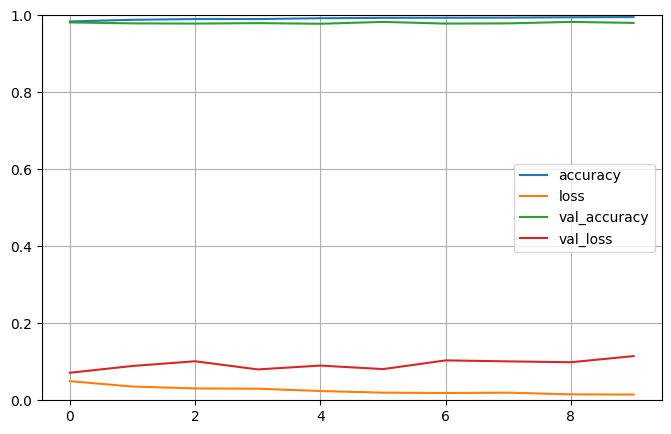

In [ ]:
#plotting the training loss vs test loss
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


MLP with regularization


In [ ]:
from tensorflow.keras import regularizers
model_r = keras.models.Sequential()
model_r.add(keras.layers.Flatten(input_shape=[28, 28]))
model_r.add(keras.layers.Dense(30, activation="relu",kernel_regularizer=regularizers.l2(0.001)))
model_r.add(keras.layers.Dense(20, activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model_r.add(keras.layers.Dropout(0.5))
model_r.add(keras.layers.Dense(10, activation="softmax"))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_r.compile(loss="sparse_categorical_crossentropy",
 optimizer="Adam",
 metrics=["accuracy"])
history_r=model_r.fit(x_train, y_train, epochs=15,validation_split=0.1 ,batch_size=32)

Epoch 1/15
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5360 - loss: 1.4854 - val_accuracy: 0.9329 - val_loss: 0.4467
Epoch 2/15
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7737 - loss: 0.8498 - val_accuracy: 0.9455 - val_loss: 0.3874
Epoch 3/15
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7997 - loss: 0.7646 - val_accuracy: 0.9504 - val_loss: 0.3461
Epoch 4/15
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8154 - loss: 0.7095 - val_accuracy: 0.9507 - val_loss: 0.3284
Epoch 5/15
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8258 - loss: 0.6799 - val_accuracy: 0.9545 - val_loss: 0.3116
Epoch 6/15
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8339 - loss: 0.6562 - val_accuracy: 0.9595 - val_loss: 0.2988
Epoch 7/15
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8423 - loss: 0.6251 - val_accuracy: 0.9582 - val_loss: 0.2946
Epoch 8/15
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8468 - loss: 0.6083 - 

In [ ]:
loss_r,accuracy_r=model_r.evaluate(x_test, y_test)
print(loss_r)
print(accuracy_r)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9309 - loss: 23.4077
19.504179000854492
0.9419000148773193


In [ ]:
!pip install Pillow

In [ ]:
from sklearn.datasets import load_sample_image
# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255

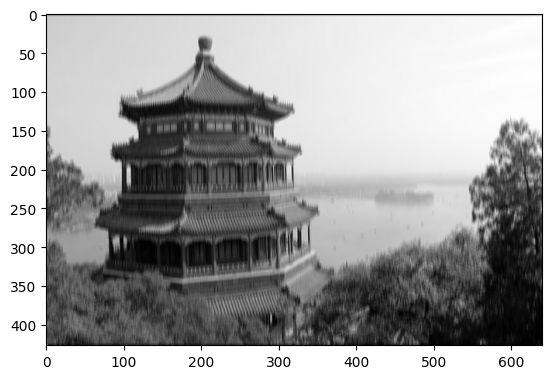

In [ ]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

minset with cnn

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model_cnn = keras.models.Sequential([
 keras.layers.Conv2D(64, 7, activation="relu", padding="same",
 input_shape=[28, 28, 1]),
 keras.layers.MaxPooling2D(2),
 keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
 keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
 keras.layers.MaxPooling2D(2),
 keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
 keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
 keras.layers.MaxPooling2D(2),
 keras.layers.Flatten(),
 keras.layers.Dense(128, activation="relu"),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(64, activation="relu"),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#preprocess
#the x_train shape is =(60000,28,28):this means 60000 grayscale images ,each 28*28
# after reshaping we have x_train_cnn with shape: 60000 grayscale ,each 28*28 with one channel
#because CNNs expect a 4D tensor: (batch_size, height, width, channels).
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [ ]:
model_cnn.compile(loss="sparse_categorical_crossentropy",
 optimizer="Adam",
 metrics=["accuracy"])
history_cnn=model_cnn.fit(x_train_cnn, y_train, epochs=10,validation_split=0.1 ,batch_size=32)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 605s 357ms/step - accuracy: 0.6697 - loss: 0.9458 - val_accuracy: 0.9840 - val_loss: 0.0664
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 602s 356ms/step - accuracy: 0.9680 - loss: 0.1380 - val_accuracy: 0.9878 - val_loss: 0.0514
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 600s 355ms/step - accuracy: 0.9784 - loss: 0.0913 - val_accuracy: 0.9917 - val_loss: 0.0321
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 600s 355ms/step - accuracy: 0.9833 - loss: 0.0736 - val_accuracy: 0.9918 - val_loss: 0.0395
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 599s 355ms/step - accuracy: 0.9861 - loss: 0.0583 - val_accuracy: 0.9913 - val_loss: 0.0399
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 600s 355ms/step - accuracy: 0.9878 - loss: 0.0536 - val_accuracy: 0.9927 - val_loss: 0.0325
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 599s 355ms/step - accuracy: 0.9880 - loss: 0.0504 - val_accuracy: 0.9930 - val_loss: 0.0436
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 599s 355ms/step - ac

In [ ]:
loss,accuracy=model_cnn.evaluate(x_test_cnn, y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 94ms/step - accuracy: 0.9891 - loss: 0.0539
0.041786108165979385
0.9921000003814697


**we got better results than simple MLP!**

testing with a pretrained cnn (restnet,googlenet..ect)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 1. Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Expand grayscale (28x28 → 28x28x1 → 28x28x3 → 224x224x3)
x_train = tf.image.resize(tf.image.grayscale_to_rgb(tf.expand_dims(x_train, -1)), (224, 224))
x_test = tf.image.resize(tf.image.grayscale_to_rgb(tf.expand_dims(x_test, -1)), (224, 224))

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)





11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


now we try the same models on CIFAR-10 dataset

In [ ]:
import gc, tensorflow as tf
gc.collect()
tf.keras.backend.clear_session()


In [ ]:
!pip install tensorflow

## **Preprocessing**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

AUTOTUNE = tf.data.AUTOTUNE


train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

IMG_SIZE = (224, 224)
#resize data
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, IMG_SIZE), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, IMG_SIZE), y))
#normlize data
train_ds = train_ds.map(lambda x, y: (preprocess_input(tf.cast(x, tf.float32)), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(tf.cast(x, tf.float32)), y))


train_ds = train_ds.shuffle(100).batch(32).prefetch(buffer_size=AUTOTUNE)

test_ds = test_ds.batch(32).prefetch(buffer_size=AUTOTUNE)

In [ ]:
print(train_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None))>


##**Data Augmentation**

##**Load the model**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load ResNet50 base model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))

# Freeze base model initially
base_model.trainable = False

# Add custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])


##**train the mdodel (phase 1:train the new layers)**






In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history1 = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    steps_per_epoch=100,   # limite les batchs par epoch
    validation_steps=20
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 142ms/step - accuracy: 0.5338 - loss: 1.5779 - val_accuracy: 0.8516 - val_loss: 0.4435
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.8000 - loss: 0.5969 - val_accuracy: 0.8844 - val_loss: 0.3662
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.8118 - loss: 0.5560 - val_accuracy: 0.8734 - val_loss: 0.3570
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.8242 - loss: 0.5020 - val_accuracy: 0.8875 - val_loss: 0.3497
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.8341 - loss: 0.4882 - val_accuracy: 0.8969 - val_loss: 0.3261
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.8368 - loss: 0.4672 - val_accuracy: 0.8891 - val_loss: 0.3349
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.8518 - loss: 0.4577 - val_accuracy: 0.8922 - val_loss: 0.3160
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.8212 - loss: 0.

##**Phase 2 – Fine-tune last layers of ResNet50**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2)
]
# Unfreeze some layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-50]:  # freeze all but last 50 layers
    layer.trainable = False

# Compile with smaller learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history2 = model.fit(train_ds, validation_data=test_ds, epochs=5,
                     callbacks=callbacks,  batch_size=32)  # EarlyStopping or ReduceLROnPlateau



Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 281s 163ms/step - accuracy: 0.8698 - loss: 0.3887 - val_accuracy: 0.9332 - val_loss: 0.1965 - learning_rate: 1.0000e-05
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 238s 152ms/step - accuracy: 0.9432 - loss: 0.1763 - val_accuracy: 0.9404 - val_loss: 0.1792 - learning_rate: 1.0000e-05
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 255s 163ms/step - accuracy: 0.9665 - loss: 0.1040 - val_accuracy: 0.9445 - val_loss: 0.1779 - learning_rate: 1.0000e-05
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 238s 152ms/step - accuracy: 0.9821 - loss: 0.0572 - val_accuracy: 0.9458 - val_loss: 0.1972 - learning_rate: 1.0000e-05
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 278s 163ms/step - accuracy: 0.9887 - loss: 0.0363 - val_accuracy: 0.9436 - val_loss: 0.2100 - learning_rate: 1.0000e-05


##**Evaluate the model**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.9452 - loss: 0.1750
Test Loss: 0.1779
Test Accuracy: 0.9445


In [ ]:
import tensorflow as tf
import numpy as np

# Load your own image
img_path = "/content/cat.jpg"   # change to your image path
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))  # same size as training
img_array = tf.keras.utils.img_to_array(img)

# Scale/normalize (if you did it during training)
img_array = img_array / 255.0

# Add batch dimension (model expects [batch, height, width, channels])
img_array = np.expand_dims(img_array, axis=0)

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

print(f"Predicted class index: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted class index: 3


##**Save the model**

In [ ]:
# SavedModel format (folder with assets + variables)
model.save("resnet_model.keras")

# OR in HDF5 format
model.save("resnet_model.h5")


In [ ]:
!zip -r resnet_model.zip resnet_model.keras


  adding: resnet_model.keras (deflated 9%)


In [ ]:
from google.colab import files


# If SavedModel zipped
files.download("resnet_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>